In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000705432"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000705432
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,SOUTHSIDE BANCSHARES INC
Ticker,SBSI


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,48.0,7.279792e+00,9.051425e+00,0.0,0.0,0.0,1.798250e+01,22.48
interest income,52.0,3.534827e+07,1.059120e+07,15281000.0,29783250.0,33064000.0,4.024525e+07,59027000.00
net income,52.0,1.004644e+07,4.533939e+06,-3945000.0,7700250.0,10288000.0,1.186525e+07,20303000.00
net interest income,52.0,2.592456e+07,9.480228e+06,8726000.0,21199250.0,24290500.0,3.404225e+07,44133000.00
provision for loan losses,52.0,2.256269e+06,1.422659e+06,-918000.0,1278500.0,2206500.0,3.270500e+06,5339000.00
total revenue,6.0,5.475017e+07,1.823645e+06,52062000.0,53537000.0,55287000.0,5.592700e+07,56771000.00


# Plots

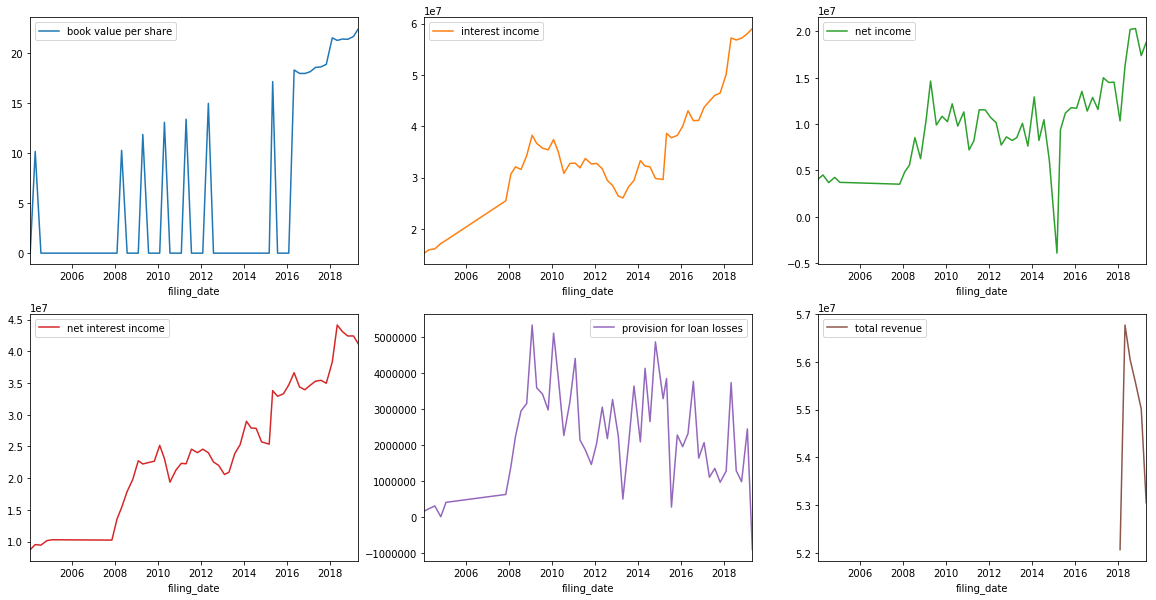

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000705432 book value per share       2005Q1 to 2007Q2: 10 periods  missing   
           book value per share                             2013Q1  missing   
           book value per share                             2014Q1  missing   
           book value per share        2015Q3 to 2015Q4: 2 periods  missing   
           interest income            2005Q1 to 2007Q2: 10 periods  missing   
           net income                 2005Q1 to 2007Q2: 10 periods  missing   
           net interest income        2005Q1 to 2007Q2: 10 periods  missing   
           provision for loan losses  2005Q1 to 2007Q2: 10 periods  missing   
           total revenue              2003Q4 to 2017Q3: 56 periods  missing   

                                             message  
cik        item                                       
0000705432 book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()